In [56]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.colors

In [120]:
def load(path, json=False):
    if json:
        pass # TODO: implement once JSON saving in Csharp script is configured.
    else:
        with open(path) as f:
            lines = f.readlines()

        lines = [line.replace("\n", "").replace(" ", "") for line in lines]
        return np.array([[l[1:-1].split(",") for l in line.split(";")] for line in lines]).astype(float)

In [173]:
def implot(values, cmap=plt.cm.get_cmap("PiYG",5), extent=None, 
           titles=["Cell distances", "Sample distances"], suptitle="Distances"):
    fig, axs = plt.subplots(ncols=values.shape[2], figsize=(16,10), gridspec_kw={'width_ratios': [1]*values.shape[2]})
    
    vmin = values.min()
    vmax = values.max()
    titles = list(titles) + [""]*(values.shape[2]-len(titles))

    if values.shape[2]==1:
        im = axs.imshow(values[:,:,i], 
                    cmap=cmap, interpolation='none', 
                    origin="lower",
                    extent=exectent,
                    vmin=vmin, vmax=vmax)
        axs.set_title(titles[0])
    else:
        for i in range(values.shape[2]):
            im = axs[i].imshow(values[:,:,i], 
                        cmap=cmap, interpolation='none', 
                        origin="lower",
                        extent=extent,
                        vmin=vmin, vmax=vmax)
            axs[i].set_title(titles[i])

    if cmap is None:
        cmap = plt.cm.get_cmap("viridis", 10)
        cmap.set_bad(color='red')

    fig.tight_layout()
    fig.colorbar(im, ax=axs, orientation='horizontal', fraction=.1, aspect=30, pad=0.1)
    fig.subplots_adjust(top=1.0, bottom=0.16)
    st = fig.suptitle(suptitle, fontsize=15)
    st.set_y(0.7)
    
    return fig, axs

In [134]:
def angle_plot(values, cmap=plt.cm.get_cmap("PiYG",5), extent=None, 
           titles=["A_{s,sc}", "A_{s,sc}", "A_{s,sc}"]):
        pass # TODO: implement with dict of angle:value pairs from json

In [128]:
def in_out(path, 
           values=None,
           plot=True, 
           cmap=plt.cm.get_cmap("PiYG",5), 
           extent=None, 
           titles=["Cell distances", "Sample distances"], suptitle="Distances"): 
    
    if values is None:
        values = load(path)
    
    if plot:
        implot(values, cmap=cmap, extent=extent, titles=titles, suptitle=suptitle)

        return values, fig, axs
    return values, None, None

In [57]:
def name_gen(n): return f"Output n={2**n}.txt"

In [135]:
cmp = plt.cm.get_cmap("viridis")
cmp.set_bad(color='red')

In [132]:
k = 8
folder = os.path.join("UnityStuff", "Logs", "Distances2D")
path = os.path.join(os.getcwd(), folder, name_gen(k))
absorption_titles=["A_{s,sc}", "A_{s,sc}", "A_{s,sc}"]
values = load(path)

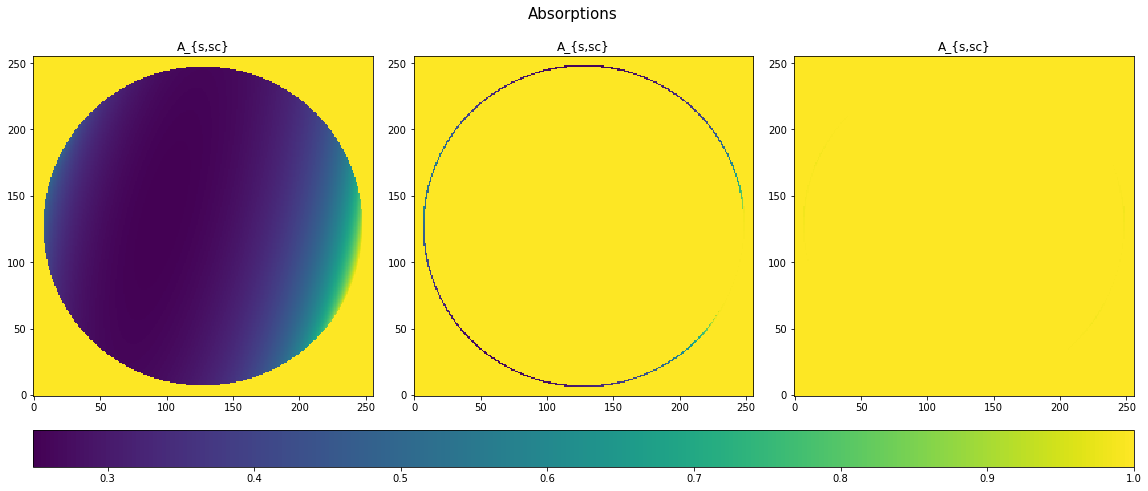

In [174]:
fig, axs = implot(values, cmap=cmp, titles=absorption_titles, suptitle="Absorptions")